In [33]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

LOADING THE DATASET

In [34]:
# Load dataset
df = pd.read_csv("/content/UCI_Credit_Card.csv")

In [35]:
# To find the shape of the dataset
print(df.shape)

(30000, 25)


In [36]:
# To print the necessary data
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [37]:
# Describing the stats
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [38]:
# To see if there is missing value
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


PREPROCESSING

In [39]:
# Handling Missing values
df.fillna(df.median(), inplace=True)

In [40]:
# Encode Categorical Features (if any)
df = pd.get_dummies(df, drop_first=True)

In [41]:
# Separate Features & Target
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

In [42]:
# Split - Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

FEATURE SCALING

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

DATA VISUALIZATION

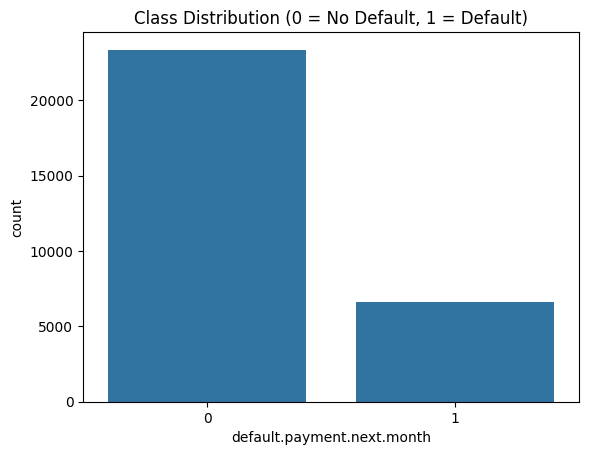

In [44]:
# CLASS DISTRIBUTION
plt.figure()
sns.countplot(x=y)
plt.title("Class Distribution (0 = No Default, 1 = Default)")
plt.show()

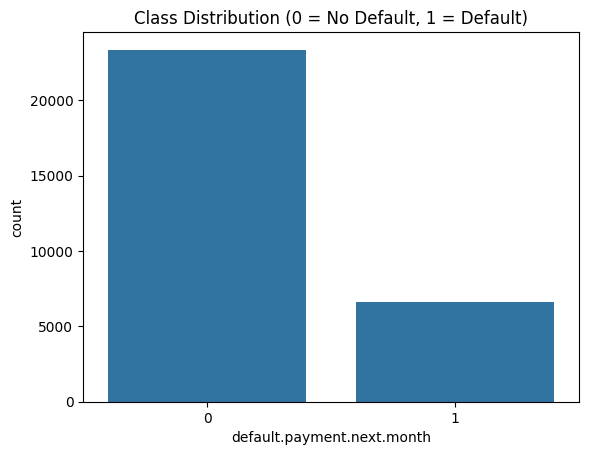

In [45]:
# FEATURE DISTRIBUTION
plt.figure()
sns.countplot(x=y)
plt.title("Class Distribution (0 = No Default, 1 = Default)")
plt.show()

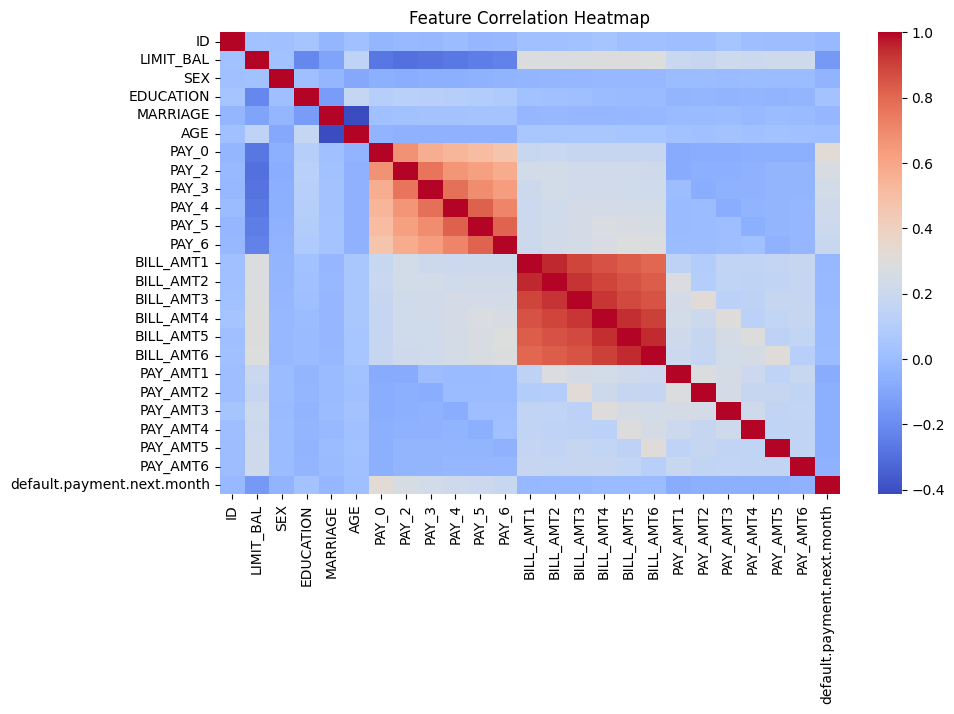

In [46]:
#CORRELATION HEATMAPS
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

TRAINING THE MODEL

In [47]:
# Logistic Regression (baseline)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [49]:
# Model Evaluation
models = [("Logistic Regression", lr), ("Random Forest", rf)]

for name, model in models:
    y_pred = model.predict(X_test_scaled if name=="Logistic Regression" else X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled if name=="Logistic Regression" else X_test)[:,1]))
    print(confusion_matrix(y_test, y_pred))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.70      0.24      0.36      1659

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500

ROC AUC: 0.7157150937455593
[[5673  168]
 [1259  400]]
=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5841
           1       0.66      0.37      0.48      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

ROC AUC: 0.7597332423549973
[[5517  324]
 [1037  622]]


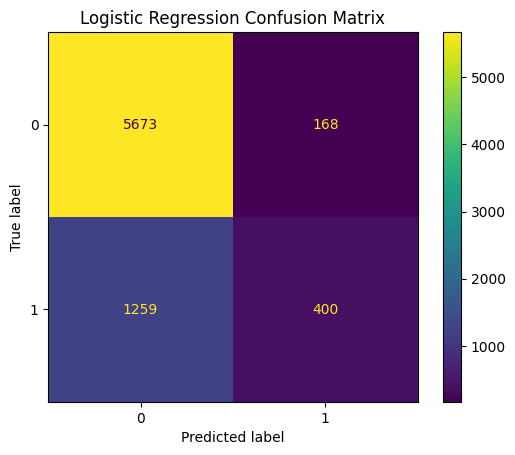

In [50]:
ConfusionMatrixDisplay.from_estimator(
    lr, X_test_scaled, y_test
)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

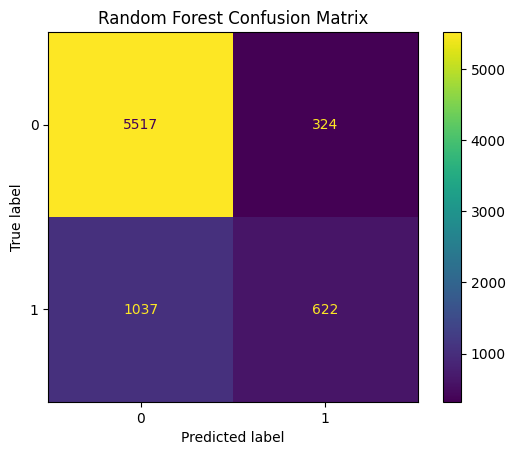

In [51]:
ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test
)
plt.title("Random Forest Confusion Matrix")
plt.show()

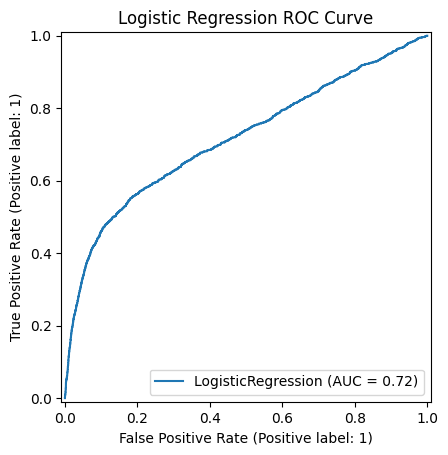

In [52]:
RocCurveDisplay.from_estimator(
    lr, X_test_scaled, y_test
)
plt.title("Logistic Regression ROC Curve")
plt.show()

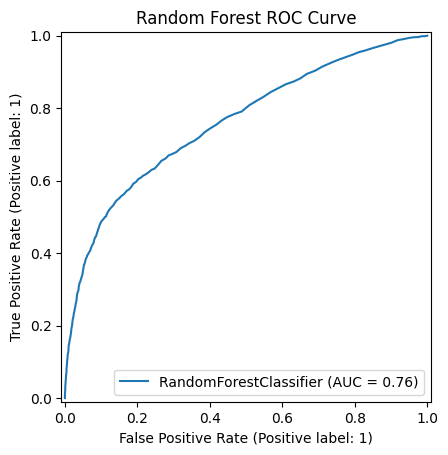

In [53]:
RocCurveDisplay.from_estimator(
    rf, X_test, y_test
)
plt.title("Random Forest ROC Curve")
plt.show()

SIMPLE PREDICTION

In [54]:
# Test Data
rf_predictions = rf.predict(X_test)

print(rf_predictions[:10])

[1 0 0 0 0 0 1 0 0 0]


In [55]:
# on probability
rf_probabilities = rf.predict_proba(X_test)

print(rf_probabilities[:5])

[[0.445 0.555]
 [0.56  0.44 ]
 [0.795 0.205]
 [0.59  0.41 ]
 [0.815 0.185]]


In [56]:
# Prediction for one new customer
new_customer = X_test.iloc[[0]]  # taking one real example

prediction = rf.predict(new_customer)
probability = rf.predict_proba(new_customer)

print("Prediction (0=No Default, 1=Default):", prediction[0])
print("Default Probability:", probability[0][1])

Prediction (0=No Default, 1=Default): 1
Default Probability: 0.555


In [57]:
if prediction[0] == 1:
    print("High Credit Risk Customer")
else:
    print("Low Credit Risk Customer")

High Credit Risk Customer
